In [1]:
import rmgpy
import numpy as np
from rmgpy.molecule.molecule import *
from rmgpy.species import *
from rmgpy.chemkin import *
from rmgpy.data.rmg import RMGDatabase
from IPython.display import display
from rmgpy.data.thermo import ThermoLibrary
from rmgpy.rmg.react import react
from rmgpy.species import Species
from rmgpy.reaction import Reaction
from rmgpy.data.rmg import get_db
from rmgpy.molecule.group import Group
from rmgpy.kinetics.arrhenius import ArrheniusBM
from rmgpy import settings
import time
import matplotlib.pyplot as plt
import matplotlib

In [2]:
settings

{'database.directory': '/home/khalil.nor/Code/RMG-database/input',
 'test_data.directory': '/home/khalil.nor/Code/RMG-Py/rmgpy/test_data'}

In [3]:
#these families just had training rxns added to them 

#dict_keys(['1,2_Insertion_carbene', 'R_Addition_MultipleBond', 'XY_Addition_MultipleBond', 'Singlet_Carbene_Intra_Disproportionation', '1,2_Insertion_CO', '1+2_Cycloaddition', '1,3_Insertion_CO2', '1,3_sigmatropic_rearrangement'])

In [5]:
thermo_libs = [
'C1_C2_Fluorine', #adding Siddha's as first most trusted because this is the thermo library that Franklin used
'NCSU_C2_C8_PFAS', #adding Westmoreland's thermo as the second most trusted
'primaryThermoLibrary',
'Fluorine',
'FFCM1(-)',
'halogens',
'CHOF_G4',
'CHOCl_G4',
'CHOBr_G4',
'CHOFCl_G4',
'CHOFBr_G4',
'CHOFClBr_G4',
'DFT_QCI_thermo',
'2-BTP_G4',
'thermo_DFT_CCSDTF12_BAC',
'SulfurHaynes'
]

kin_families = ['R_Recombination', '1,2_Insertion_carbene', 'F_Abstraction', 'R_Addition_MultipleBond', 'XY_Addition_MultipleBond', 'Singlet_Carbene_Intra_Disproportionation', 'Intra_R_Add_Endocyclic', 'R_Addition_COm', '1,2_Insertion_CO', '1+2_Cycloaddition', '1,3_Insertion_CO2', '1,3_sigmatropic_rearrangement']

In [6]:
database = RMGDatabase()
database.load(
            path = settings['database.directory'],
            thermo_libraries = thermo_libs,
            transport_libraries = [],
            reaction_libraries = [],
            seed_mechanisms = [],#['BurkeH2O2inN2','ERC-FoundationFuelv0.9'],
            kinetics_families = kin_families,
            kinetics_depositories = ['training'],
            #frequenciesLibraries = self.statmechLibraries,
            depository = False, # Don't bother loading the depository information, as we don't use it
        )


In [7]:
database.kinetics.families

{'1+2_Cycloaddition': <ReactionFamily "1+2_Cycloaddition">,
 '1,2_Insertion_CO': <ReactionFamily "1,2_Insertion_CO">,
 '1,2_Insertion_carbene': <ReactionFamily "1,2_Insertion_carbene">,
 '1,3_Insertion_CO2': <ReactionFamily "1,3_Insertion_CO2">,
 '1,3_sigmatropic_rearrangement': <ReactionFamily "1,3_sigmatropic_rearrangement">,
 'F_Abstraction': <ReactionFamily "F_Abstraction">,
 'Intra_R_Add_Endocyclic': <ReactionFamily "Intra_R_Add_Endocyclic">,
 'R_Addition_COm': <ReactionFamily "R_Addition_COm">,
 'R_Addition_MultipleBond': <ReactionFamily "R_Addition_MultipleBond">,
 'R_Recombination': <ReactionFamily "R_Recombination">,
 'Singlet_Carbene_Intra_Disproportionation': <ReactionFamily "Singlet_Carbene_Intra_Disproportionation">,
 'XY_Addition_MultipleBond': <ReactionFamily "XY_Addition_MultipleBond">}

In [9]:
# 'F_Abstraction' 
family_to_train = "F_Abstraction"
family = database.kinetics.families[family_to_train]

In [10]:
family.clean_tree()

In [11]:
start = time.time()
family.generate_tree(thermo_database=database.thermo,
                     nprocs=1,
                     new_fraction_threshold_to_reopt_node=0.25,
                     max_batch_size=800,
                     extension_iter_max=2,
                     extension_iter_item_cap=100)

end = time.time()
print(end-start)

ERROR:root:242.0
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early


165.44127106666565


In [12]:
len(family.groups.entries)

372

In [13]:
family.groups.entries

{'Root': <Entry index=0 label="Root">,
 'Root_1R->O': <Entry index=1 label="Root_1R->O">,
 'Root_N-1R->O': <Entry index=2 label="Root_N-1R->O">,
 'Root_1R->O_3R->O': <Entry index=3 label="Root_1R->O_3R->O">,
 'Root_1R->O_N-3R->O': <Entry index=4 label="Root_1R->O_N-3R->O">,
 'Root_N-1R->O_3R->O': <Entry index=5 label="Root_N-1R->O_3R->O">,
 'Root_N-1R->O_N-3R->O': <Entry index=6 label="Root_N-1R->O_N-3R->O">,
 'Root_1R->O_3R->O_Ext-1O-R': <Entry index=7 label="Root_1R->O_3R->O_Ext-1O-R">,
 'Root_1R->O_3R->O_Ext-3O-R_Ext-4R!H-R': <Entry index=8 label="Root_1R->O_3R->O_Ext-3O-R_Ext-4R!H-R">,
 'Root_1R->O_3R->O_1O-u0': <Entry index=9 label="Root_1R->O_3R->O_1O-u0">,
 'Root_1R->O_3R->O_N-1O-u0': <Entry index=10 label="Root_1R->O_3R->O_N-1O-u0">,
 'Root_1R->O_N-3R->O_1O-u0': <Entry index=11 label="Root_1R->O_N-3R->O_1O-u0">,
 'Root_1R->O_N-3R->O_N-1O-u0': <Entry index=12 label="Root_1R->O_N-3R->O_N-1O-u0">,
 'Root_N-1R->O_3R->O_Ext-3O-R': <Entry index=13 label="Root_N-1R->O_3R->O_Ext-3O-R">

In [14]:
start = time.time()
family.check_tree()
end = time.time()
print(end-start)

0.17493891716003418


In [15]:
start = time.time()
family.regularize(thermo_database=database.thermo)
end = time.time()
print(end-start)

1.1260900497436523


In [16]:
start = time.time()
templateRxnMap = family.get_reaction_matches(thermo_database=database.thermo,remove_degeneracy=True,
                                             get_reverse=True,exact_matches_only=False,fix_labels=True)
end = time.time()
print(end-start)

1.018425703048706


In [17]:
len(templateRxnMap)

372

In [18]:
family.clean_tree_rules()

In [19]:
start = time.time()
family.make_bm_rules_from_template_rxn_map(templateRxnMap)#,nprocs=6)
end = time.time()
print(end-start)

/home/khalil.nor/Code/RMG-Py/rmgpy/data/kinetics/family.py:3620: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for rxns, label in rxnlists])
/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


42.83427667617798


In [20]:
start = time.time()
family.check_tree()
end = time.time()
print(end-start)

0.1781914234161377


In [21]:
start = time.time()
errors,uncertainties = family.cross_validate(iters=0,random_state=5,folds=0,ascend=False)
end = time.time()
print(end-start)

/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1.5907437801361084


In [22]:
save_path = os.path.join(settings['database.directory'], 'kinetics', 'families', family.name)
print(save_path)

/home/khalil.nor/Code/RMG-database/input/kinetics/families/F_Abstraction


In [23]:
family.save(save_path)

In [ ]:
#ran to completion on May 6th 2024, 10:15 am

In [ ]:
#let's check to see what the fit is like at the end nodes

In [1]:
from rmgpy.kinetics.uncertainties import RateUncertainty
import rmgpy
import numpy as np
from rmgpy.molecule.molecule import *
from rmgpy.species import *
from rmgpy.chemkin import *
from rmgpy.data.rmg import RMGDatabase
from IPython.display import display
from rmgpy.data.thermo import ThermoLibrary
from rmgpy.rmg.react import react
from rmgpy.species import Species
from rmgpy.reaction import Reaction
from rmgpy.data.rmg import get_db
from rmgpy.molecule.group import Group
from rmgpy.kinetics.arrhenius import ArrheniusBM, Arrhenius
from rmgpy import settings
import time
import matplotlib.pyplot as plt
import matplotlib
import rmgpy.constants as constants

In [2]:
thermo_libs = [
#'PFCA_thermo', this was not added for this family yet
'C1_C2_Fluorine', #adding Siddha's as first most trusted because this is the thermo library that Franklin used
'NCSU_C2_C8_PFAS', #adding Westmoreland's thermo as the second most trusted
'primaryThermoLibrary',
'Fluorine',
'FFCM1(-)',
'halogens',
'CHOF_G4',
'CHOCl_G4',
'CHOBr_G4',
'CHOFCl_G4',
'CHOFBr_G4',
'CHOFClBr_G4',
'DFT_QCI_thermo',
'2-BTP_G4',
'thermo_DFT_CCSDTF12_BAC',
'SulfurHaynes'
]

kin_families = ["F_Abstraction"]

database = RMGDatabase()
database.load(
            path = settings['database.directory'],
            thermo_libraries = thermo_libs,
            transport_libraries = [],
            reaction_libraries = [],
            seed_mechanisms = [],#['BurkeH2O2inN2','ERC-FoundationFuelv0.9'],
            kinetics_families = kin_families,
            kinetics_depositories = ['training'],
            #frequenciesLibraries = self.statmechLibraries,
            depository = False, # Don't bother loading the depository information, as we don't use it
        )

In [3]:
database.kinetics.families

{'F_Abstraction': <ReactionFamily "F_Abstraction">}

In [4]:
# "F_Abstraction" 
family_to_train = "F_Abstraction"
family = database.kinetics.families[family_to_train]

In [5]:
start = time.time()
templateRxnMap = family.get_reaction_matches(thermo_database=database.thermo,remove_degeneracy=True,
                                             get_reverse=True,exact_matches_only=False,fix_labels=True)
end = time.time()
print(end-start)

189.99726009368896


Let's look at some of the parent nodes (with 2 reactions) and their child nodes (with 1 reaction) to see how the fits compare

In [25]:
n_2_mapping = [key for key, value in templateRxnMap.items() if len(value)==2] #mapping of all nodes with 3 or less training rxns (parents)
n_1_mapping = [key for key, value in templateRxnMap.items() if len(value)==1] #mapping of all nodes with 1 training rxn (children)
n_4_mapping = [key for key, value in templateRxnMap.items() if len(value)==4] 
parent_to_child = {}
parent_to_child_4 = {}

for label in n_2_mapping: 
    
    #make the parent node
    parent_node, _ = family.retrieve_original_entry(label)
    
    #now find the children with just 1 reaction
    children_nodes = []
    for test_label in n_1_mapping:
        if label in test_label:
            child_node, _ = family.retrieve_original_entry(test_label)
            children_nodes.append(child_node)
            
            
    if len(templateRxnMap[label])==len(children_nodes): #let's pick out the ones that are both two
        parent_to_child[parent_node.label] = [x.label for x in children_nodes]
        
for label in n_4_mapping: 
    
    #make the parent node
    parent_node, _ = family.retrieve_original_entry(label)
    
    #now find the children with just 1 reaction
    children_nodes = []
    for test_label in n_1_mapping:
        if label in test_label:
            child_node, _ = family.retrieve_original_entry(test_label)
            children_nodes.append(child_node)
            
            
    if len(templateRxnMap[label])==len(children_nodes): #let's pick out the ones that are both two
        parent_to_child_4[parent_node.label] = [x.label for x in children_nodes]
#parent_to_child is a dictionary where key = label of parent and value = label of children

[O]_r3 + COF_r12 <=> C[O]_p1 + [O]F_p23
COF_r12 + [OH]_r3 <=> FHO + CH3O-2
0.0049864 m^3/(mol*s) 4986.4 cm^3/(mol*s)


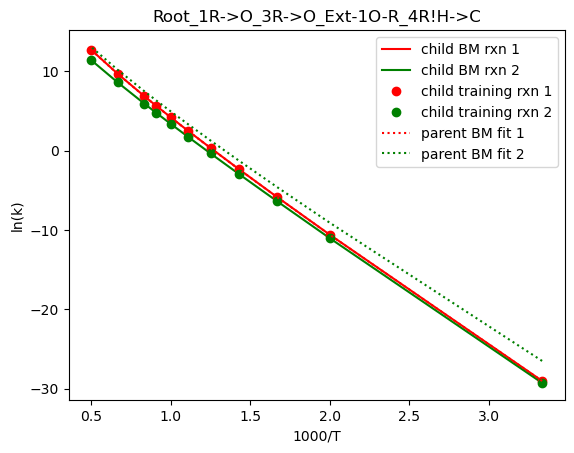

[O]O_r3 + [O]F_r12 <=> [O]_p1 + OOF_p23
[O]F + C[O] <=> [O] + COF
0.000349001 m^3/(mol*s) 0.000349001 m^3/(mol*s)


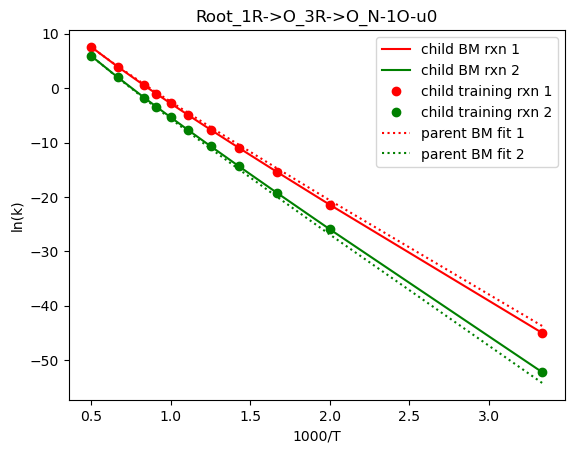

COF_r12 + CH2Cl <=> FCCl_r12 + CH3O-2
OOF + [CH2]Cl <=> [O]O + FCCl
8.19658e-06 m^3/(mol*s) 8.19658 cm^3/(mol*s)


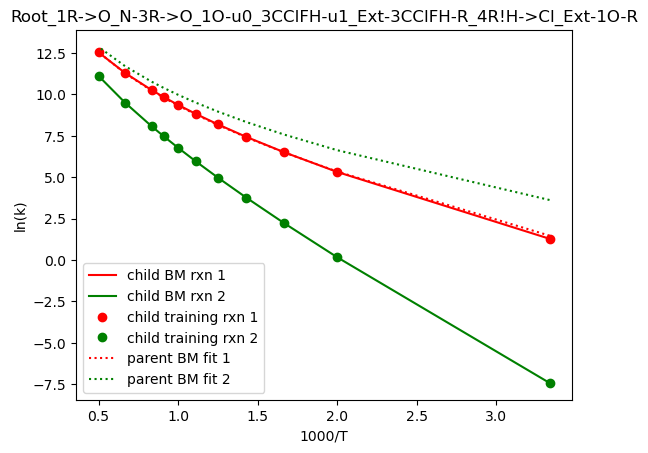

COF_r12 + C3H7-2 <=> CCCF_r12 + CH3O-2
OOF + [CH2]CC <=> [O]O + CCCF
3.20903e-06 m^3/(mol*s) 3.20903 cm^3/(mol*s)


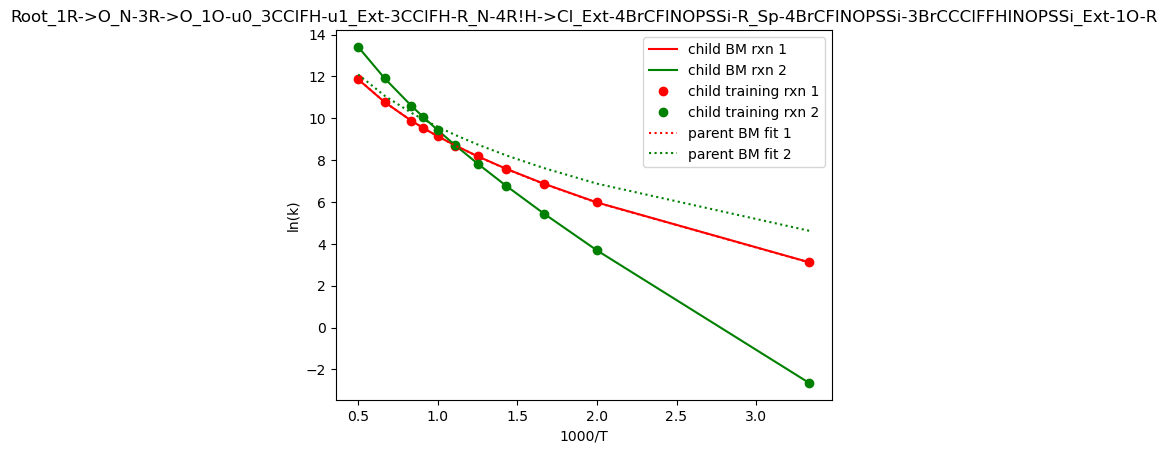

COF_r12 + C2H3 <=> CDCF_r12 + CH3O-2
OOF + [CH]=C <=> [O]O + C=CF
2.82278e-05 m^3/(mol*s) 28.2278 cm^3/(mol*s)


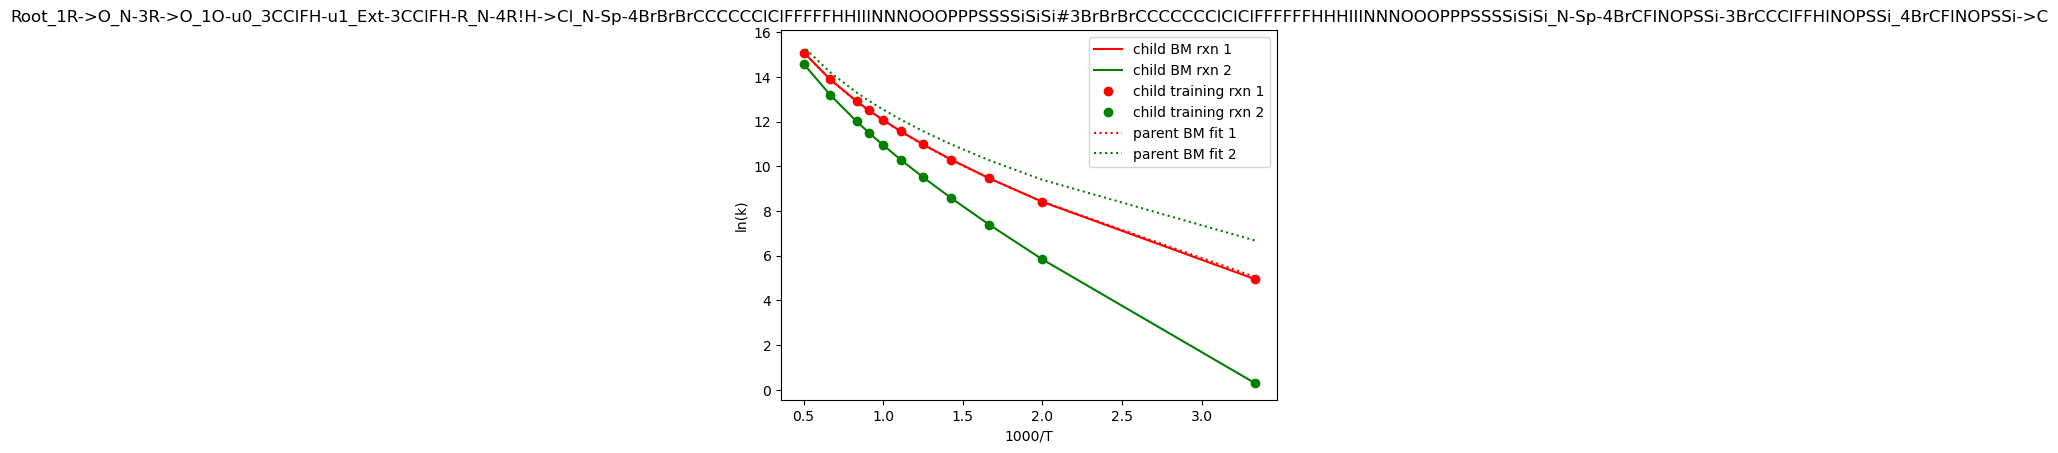

F2O + CHO <=> CHFO + OF
OOF_r12 + CHO <=> CHFO + [O]O_r3
0.02065 m^3/(mol*s) 20650 cm^3/(mol*s)


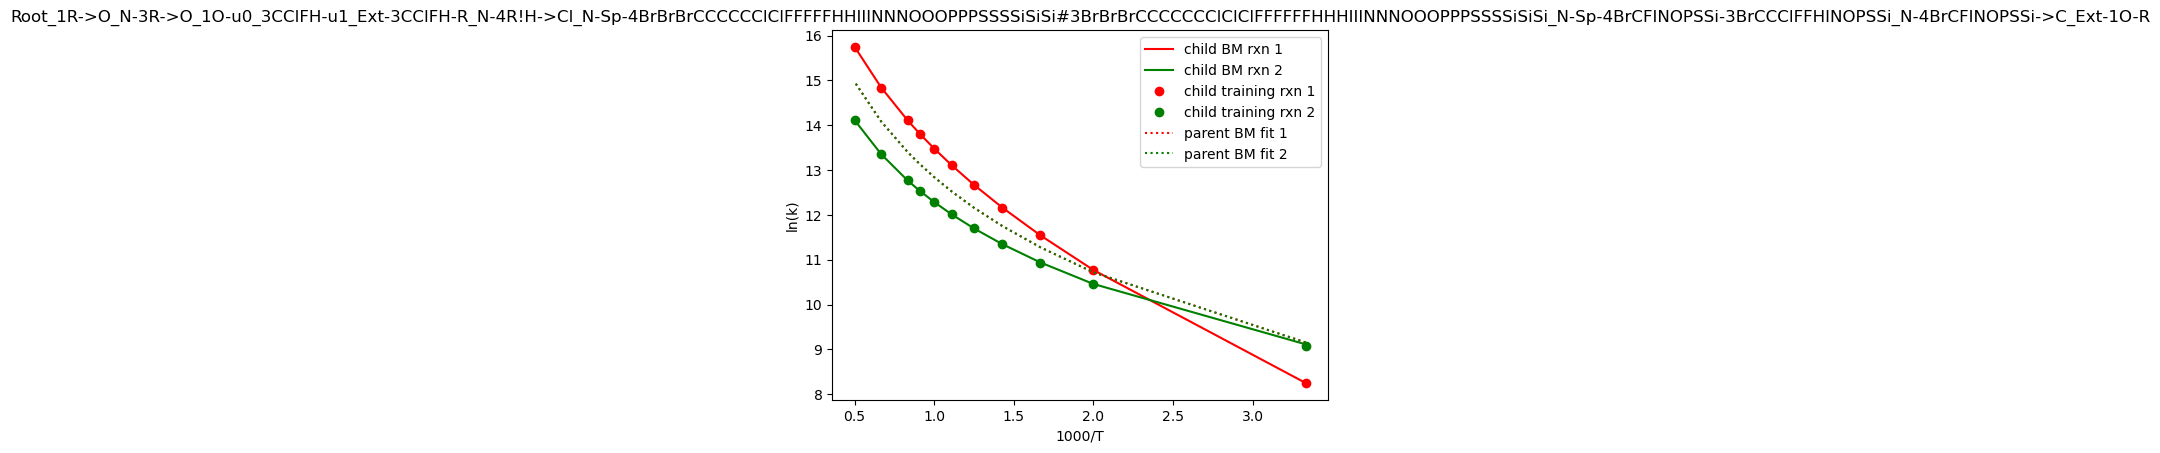

OOF_r12 + CH3 <=> [O]O_p1 + CH3F_p23
CH3 + F2O <=> CH3F_p23 + OF
0.01745 m^3/(mol*s) 17450 cm^3/(mol*s)


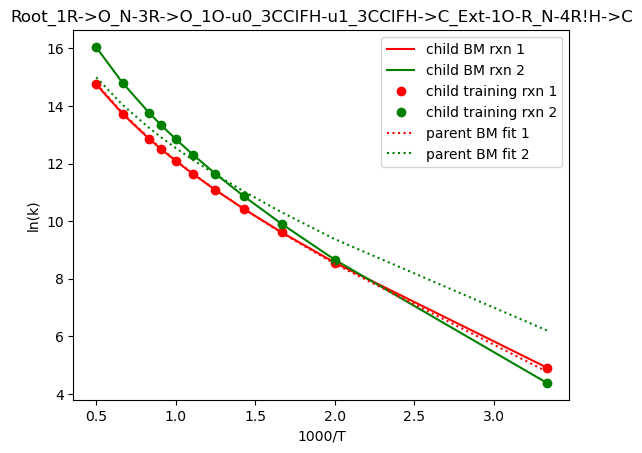

OF + [C]=C <=> [OH] + C=[C]F
OF + [CH]C <=> [OH] + C[CH]F
2.17762e-05 m^3/(mol*s) 2.17762e-05 m^3/(mol*s)


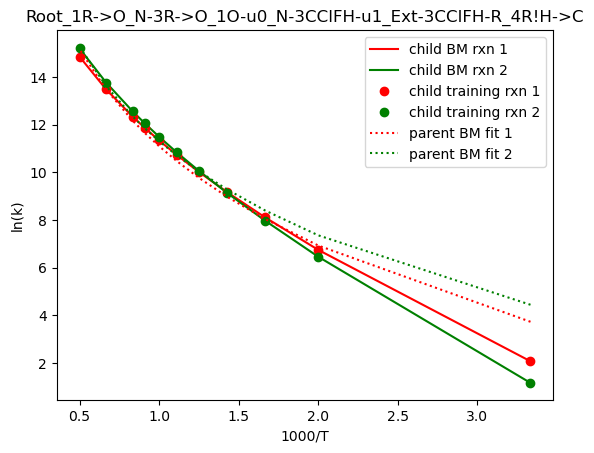

O=C(F)F + [O] <=> O=[C]F + [O]F
O=C(F)F + [OH] <=> O=[C]F + OF
6.76663 m^3/(mol*s) 6.76663 m^3/(mol*s)


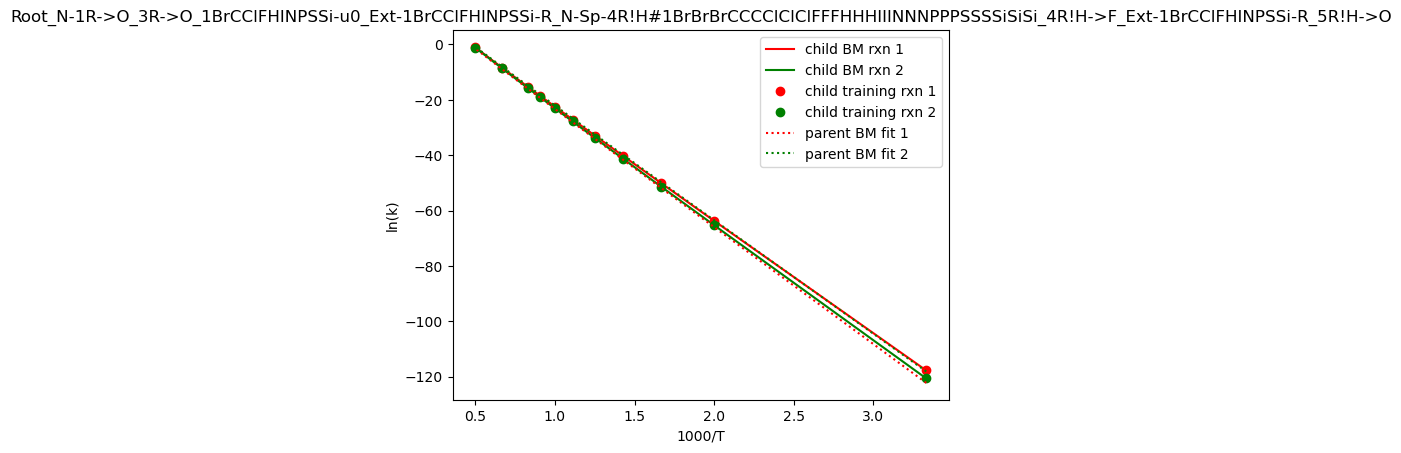

FC(F)(F)F + [O] <=> F[C](F)F + [O]F
FC(F)(F)F + [OH] <=> F[C](F)F + OF
48.7171 m^3/(mol*s) 48.7171 m^3/(mol*s)


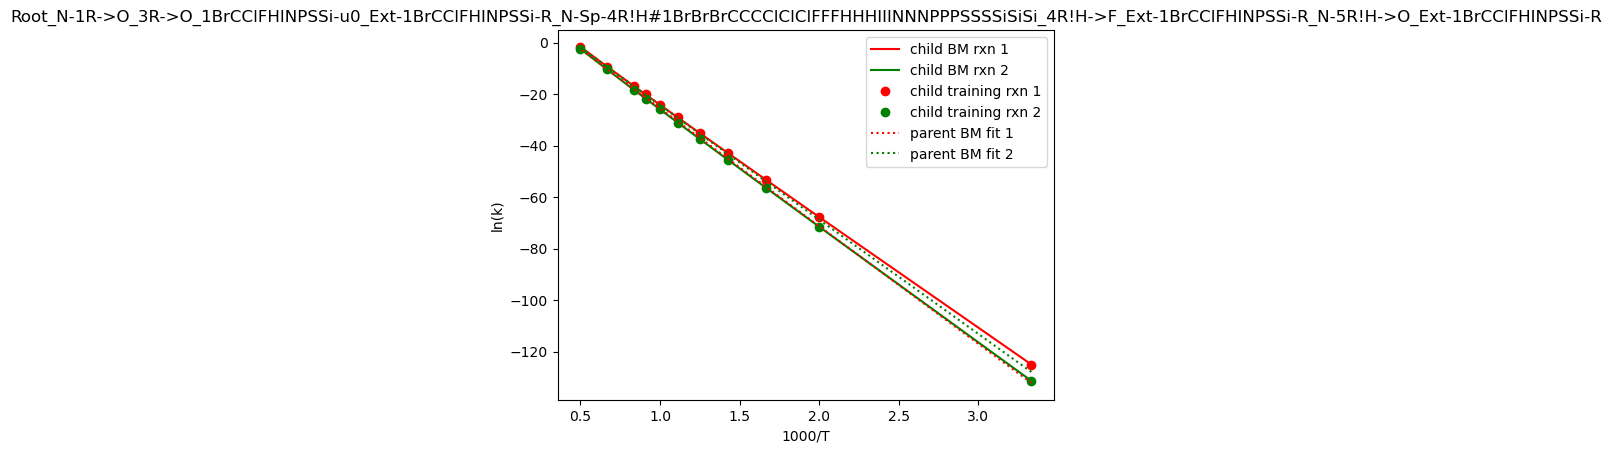

[O]_r3 + CDC(C)F_r12 <=> CD[C]C_p1 + [O]F_p23
[OH]_r3 + CDC(C)F_r12 <=> CD[C]C_p1 + OF_p23
0.0379121 m^3/(mol*s) 37912.1 cm^3/(mol*s)


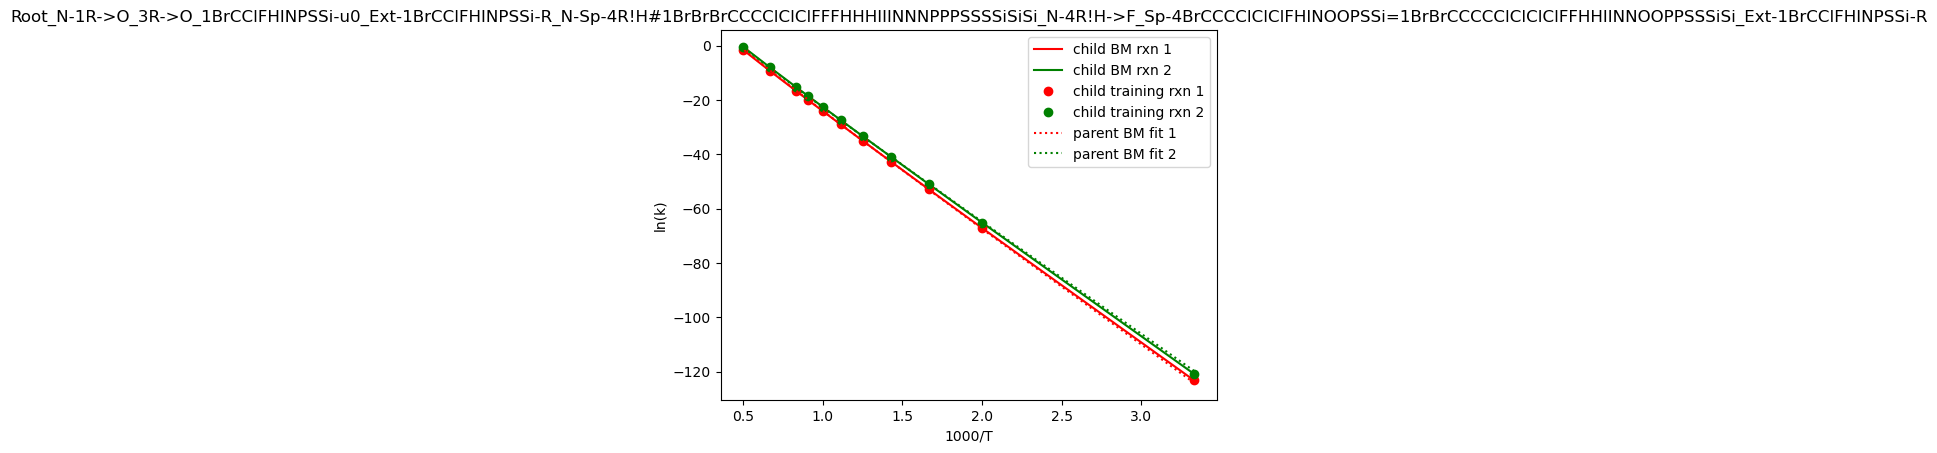

[OH]_r3 + O[C](O)F_r12 <=> O[C]O_p1 + OF_p23
C[C](O)F + [OH] <=> OF + C[C]O
couldn't find any matches
C3F8 + H <=> FH + C3F7
C4F10 + H <=> FH + C4F9
0.104833 m^3/(mol*s) 104833 cm^3/(mol*s)


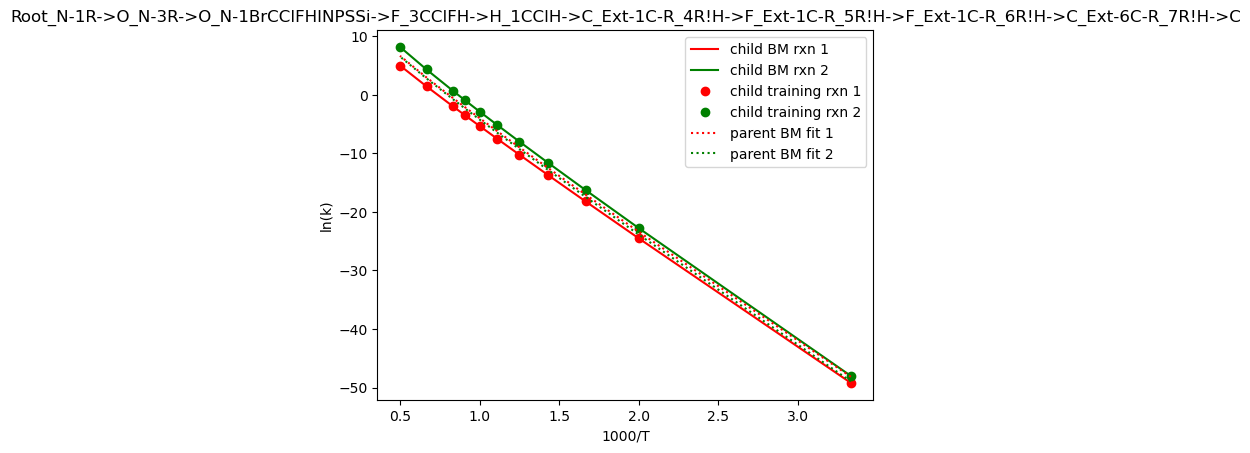

C2H4F2 + H <=> HF + C2H4F
CF2O + H <=> CFO + HF
1.84864e-10 m^3/(mol*s) 0.000184865 cm^3/(mol*s)


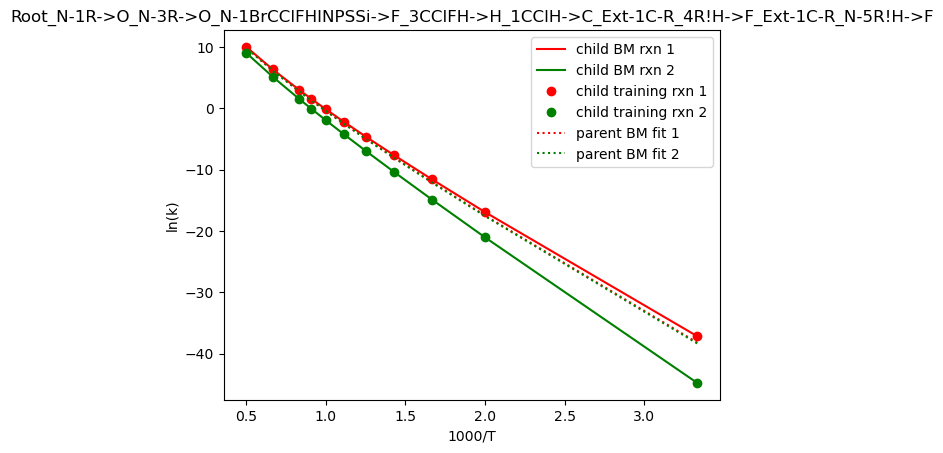

FC(F)(F)F + C=C(F)[C](F)F <=> C=C(F)C(F)(F)F + F[C](F)F
FC(F)(F)F + F[C](F)C(F)(F)F <=> FC(F)(F)C(F)(F)F + F[C](F)F
5.76532e-06 m^3/(mol*s) 5.76532e-06 m^3/(mol*s)


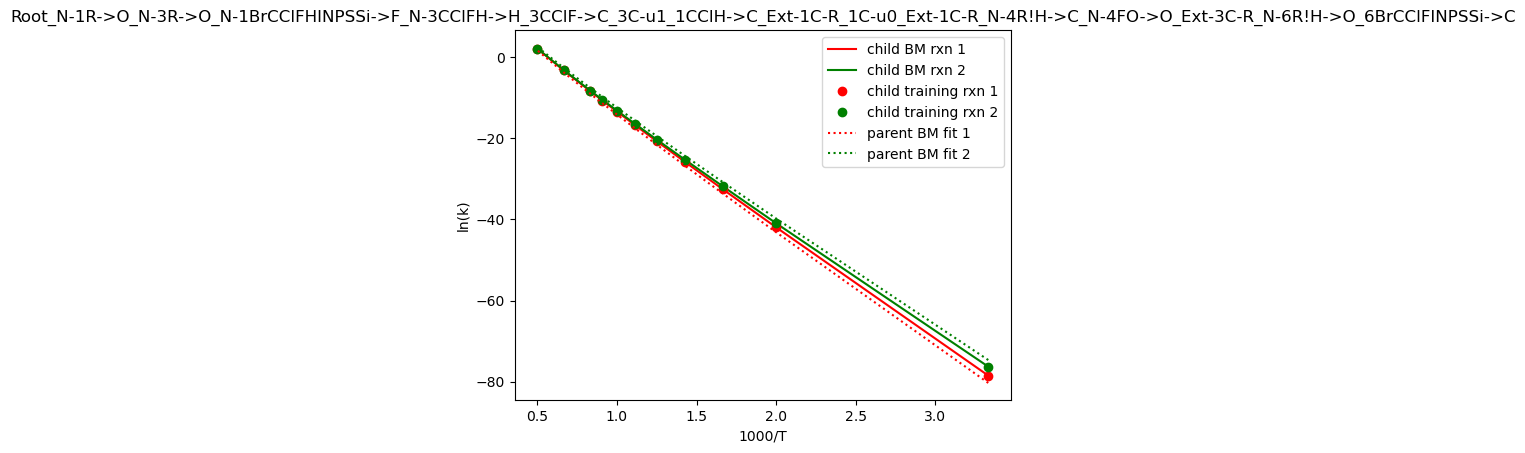

CH2F2 + C3H6F <=> C3H6F2 + CH2F
FCF + F[CH]CF <=> FCC(F)F + [CH2]F
1.31087e-08 m^3/(mol*s) 0.0131086 cm^3/(mol*s)


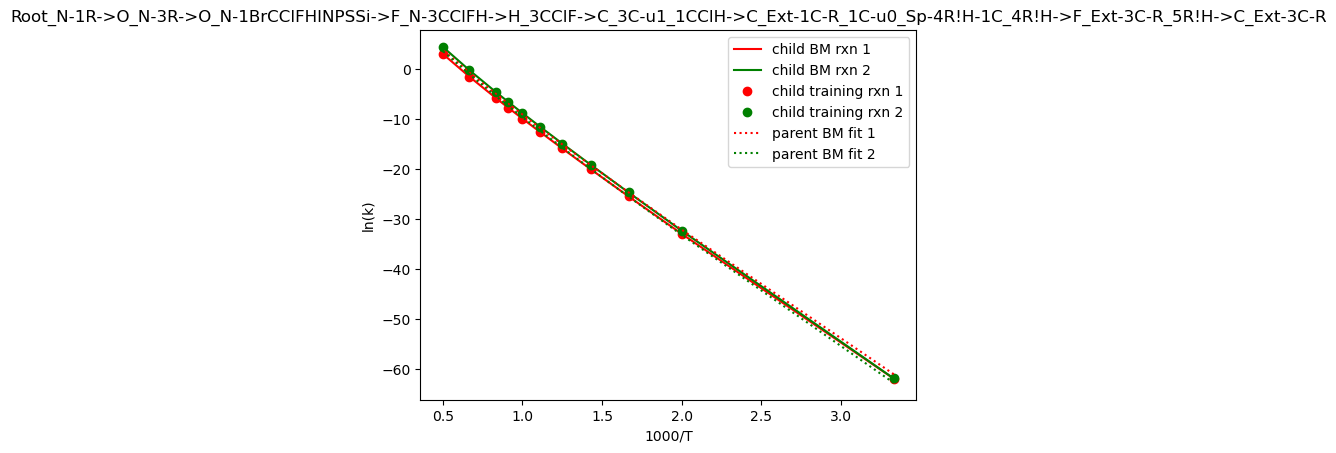

FCF + [CH2]CC <=> CCCF + [CH2]F
FCF + [CH2]CF <=> FCCF + [CH2]F
3.45985e-08 m^3/(mol*s) 3.45985e-08 m^3/(mol*s)


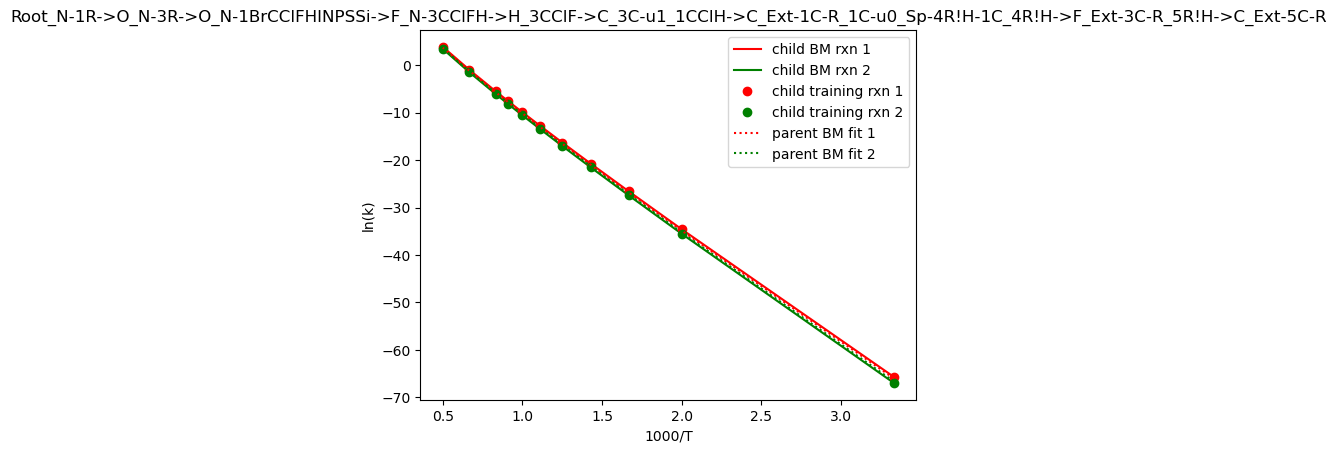

CCCF_r12 + CH2F <=> CH2F2 + C3H7-2
C2H4F2-2 + CH2F <=> CH2F2 + C2H4F-2
7.80562e-08 m^3/(mol*s) 0.0780562 cm^3/(mol*s)


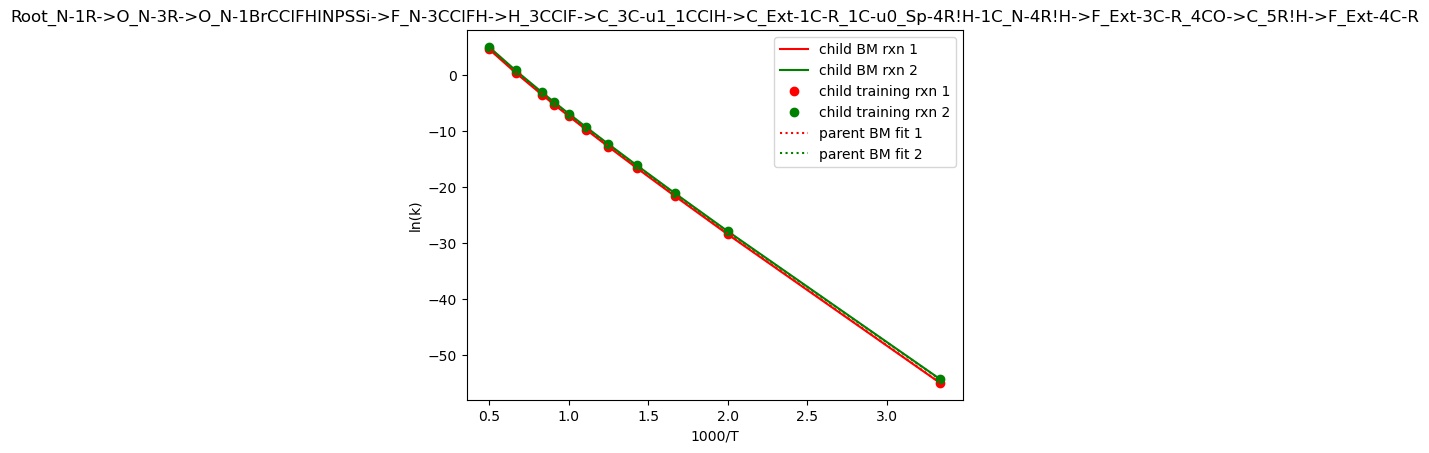

OCF_r12 + CHF2 <=> CHF3 + CH3O
OCF_r12 + C2H4F <=> C2H4F2 + CH3O
4.11856e-08 m^3/(mol*s) 0.0411856 cm^3/(mol*s)


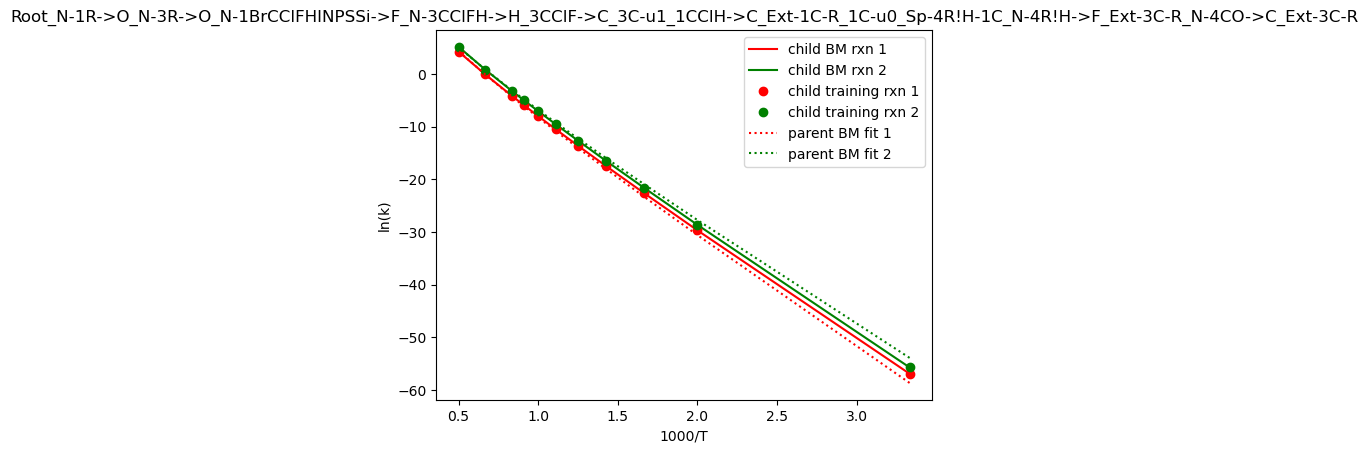

C[C](C)F_r12 + CH3 <=> C[C]C_p1 + CH3F_p23
C[C](O)F_r12 + CH3 <=> C[C]O_p1 + CH3F_p23
4.47723e-05 m^3/(mol*s) 44.7723 cm^3/(mol*s)


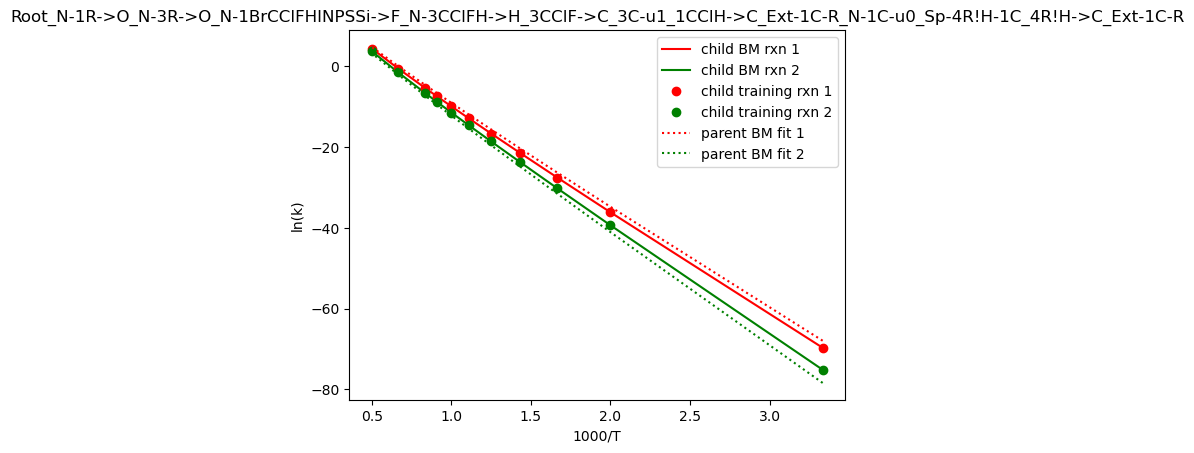

CH3F + CFO <=> CF2O + CH3
CF + C=[C]C <=> C=C(C)F + [CH3]
4.362e-07 m^3/(mol*s) 4.362e-07 m^3/(mol*s)


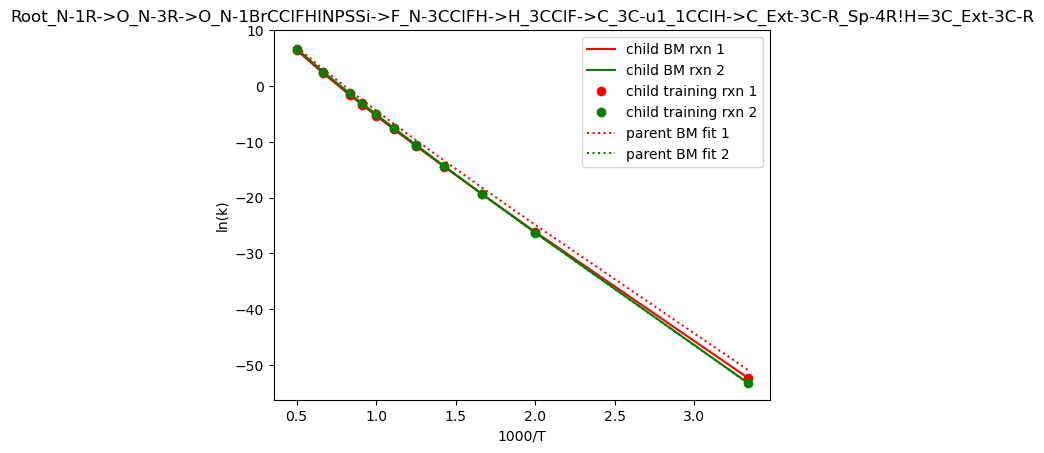

CF + C[CH]C <=> CC(C)F + [CH3]
CF + C[CH]O <=> CC(O)F + [CH3]
3.19591e-10 m^3/(mol*s) 3.19591e-10 m^3/(mol*s)


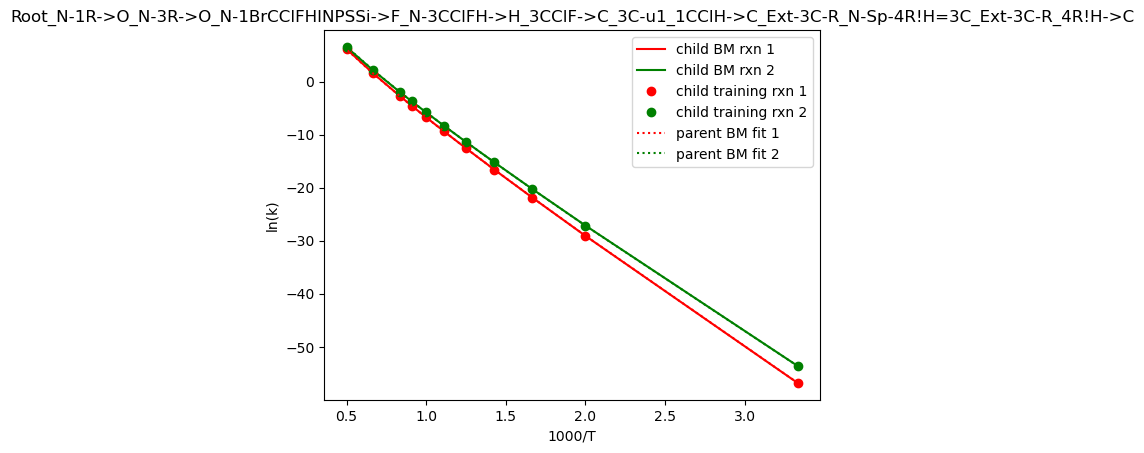

CH2F + CH3F <=> CH2F2 + CH3
CF + [CH2]O <=> OCF + [CH3]
2.43e-05 m^3/(mol*s) 24.3 cm^3/(mol*s)


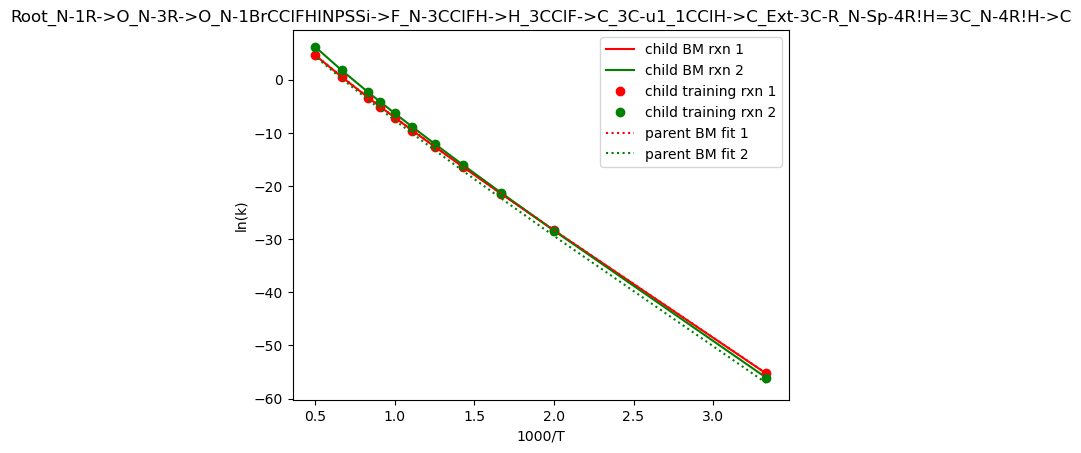

F + F[C](F)C(F)(F)C(F)(F)F <=> FC(F)(F)C(F)(F)C(F)(F)F + [H]
F + F[C](F)C(F)(F)C(F)(F)C(F)(F)F <=> FC(F)(F)C(F)(F)C(F)(F)C(F)(F)F + [H]
4.42409e-10 m^3/(mol*s) 4.42409e-10 m^3/(mol*s)


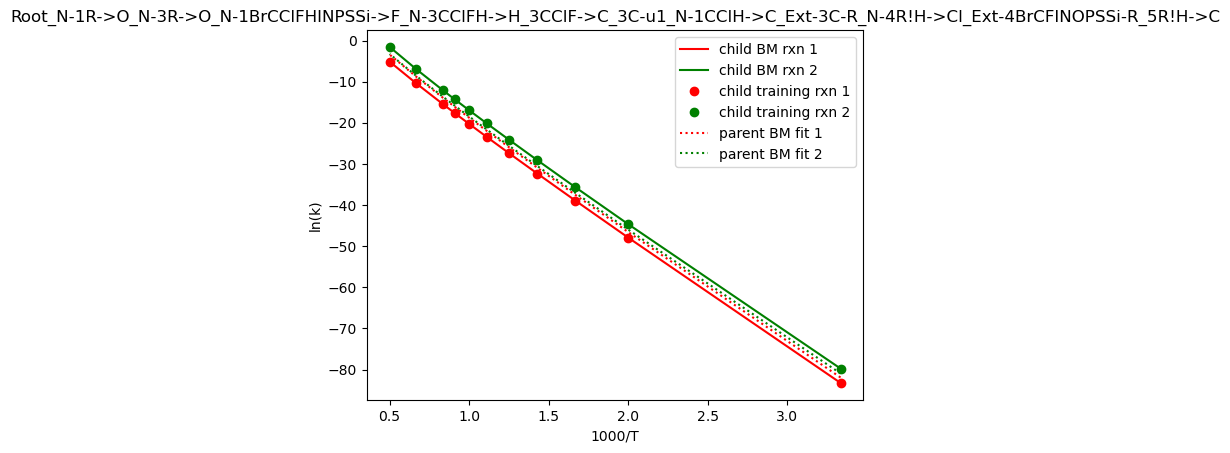

F + [CH2]O <=> OCF + [H]
[CH]=O + F <=> O=CF + [H]
6.45811e-13 m^3/(mol*s) 6.45811e-13 m^3/(mol*s)


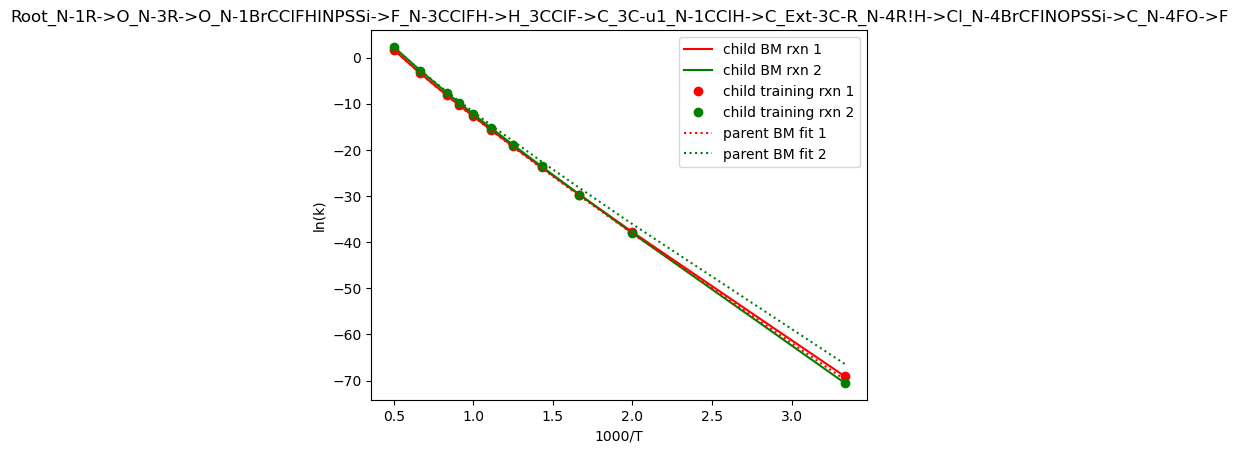

CF + C[C]O <=> C[C](O)F + [CH3]
CF + O[C]O <=> O[C](O)F + [CH3]
1.10332e-07 m^3/(mol*s) 1.10332e-07 m^3/(mol*s)


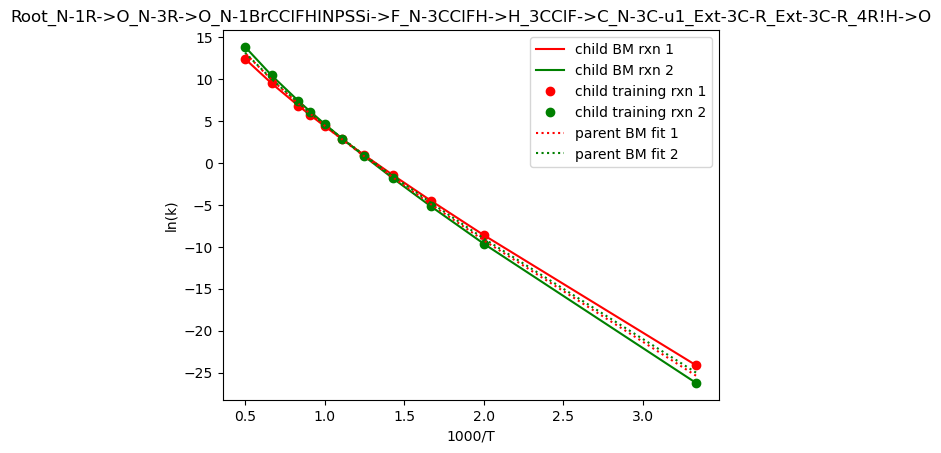

CF + [CH]O <=> O[CH]F + [CH3]
CF + [CH]C <=> C[CH]F + [CH3]
2.08267e-06 m^3/(mol*s) 2.08267e-06 m^3/(mol*s)


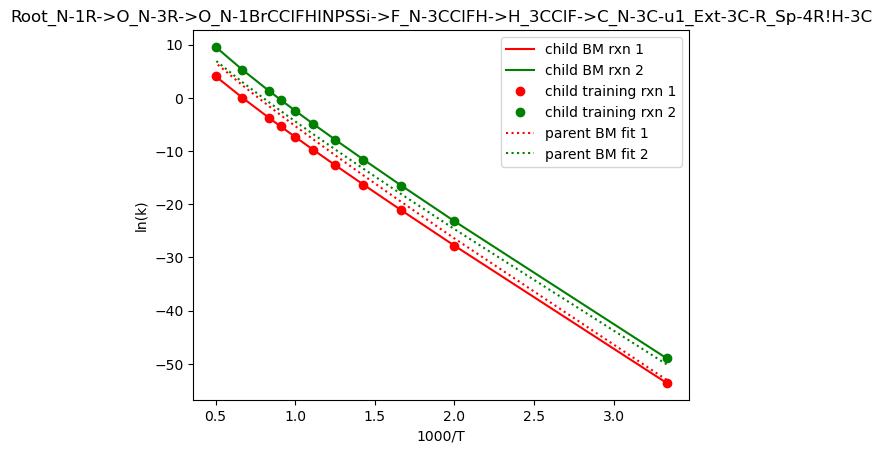

F + [F] <=> FF + [H]
F + [Cl] <=> FCl + [H]
9.23785 m^3/(mol*s) 9.23785 m^3/(mol*s)


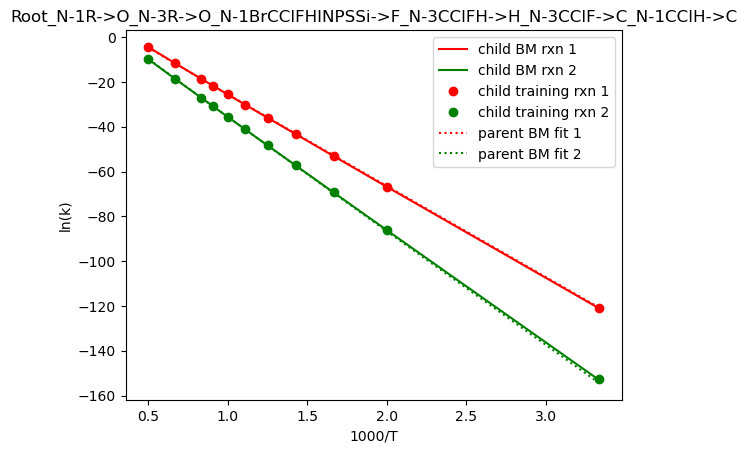

In [48]:
%matplotlib inline
temperatures = [ 300., 500.,  600.,  700. , 800.,  900., 1000., 1100., 1200., 1500., 2000.]
inverse_temps = [1000/T for T in temperatures]



for parent_label, children_labels in parent_to_child.items():
    
    training_rxns = templateRxnMap[parent_label] 
    for tr_rxn in training_rxns:
        print(tr_rxn)
    BM_entries = [family.retrieve_original_entry(label)[0].data for label in children_labels]

    matches = []
    matched_BM = []

    for BM_kinetics in BM_entries:
        for tr_rxn in training_rxns:
            BM_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(BM_kinetics.A.value_si)).group(1)
            tr_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(tr_rxn.kinetics.A.value_si)).group(1)
            if BM_str_of_float==tr_str_of_float:
                #print('yeah')
                matches.append((Reaction(reactants=tr_rxn.reactants, products=tr_rxn.products, kinetics = BM_kinetics), tr_rxn))
                matched_BM.append(BM_kinetics)
    if len(matches)==0:
        print("couldn't find any matches")
        continue
        #skipping because the A's are probably very different
        
    #if you miss matching all of them
    if len(matches)==1:
        leftover_tr_rxn = [tr_rxn for tr_rxn in training_rxns if tr_rxn not in matches[0]][0]
        leftover_BM_kinetics = [BM_kinetics for BM_kinetics in BM_entries if BM_kinetics not in matched_BM][0]
        leftover_BM_reaction = Reaction(reactants=leftover_tr_rxn.reactants, products=leftover_tr_rxn.products, kinetics = leftover_BM_kinetics)
        #print(leftover_BM_reaction.kinetics.A, leftover_tr_rxn.kinetics.A)
        matches.append((leftover_BM_reaction, leftover_tr_rxn))

#     for (BM, tr) in matches: 
#         print(str(BM.kinetics.A.value_si), str(tr.kinetics.A.value_si))
        
    child_node_1_BM_rxn, child_training_rxn_1= matches[0] 
    child_node_2_BM_rxn, child_training_rxn_2 = matches[1] 
    
    #empty lists for collecting data
    parent_node_rate_coefficients_1 = []
    parent_node_rate_coefficients_2 = []

    child_node_1_rate_coefficients = []
    child_node_2_rate_coefficients = []

    child_tr_rxn_coeffs_1 = []
    child_tr_rxn_coeffs_2 = []
    
    #let's make the parent BM node
    parent_node, _ = family.retrieve_original_entry(parent_label)
    BM_parent_rxn = Reaction(kinetics = parent_node.data)

    
    #get the dHrxns 
    
    dHrxn_1 = child_node_1_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_2 = child_node_2_BM_rxn.get_enthalpy_of_reaction(298)

    
    for temp in temperatures: 
        
        #calculate training rxn rate
        tr_rate_1 = child_training_rxn_1.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_2 =child_training_rxn_2.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap

        child_tr_rxn_coeffs_1.append(tr_rate_1)
        child_tr_rxn_coeffs_2.append(tr_rate_2)
        
        #calculate BM child rates
        BM_child_rate_1 = child_node_1_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1) #loaded in as BM kinetics 
        BM_child_rate_2 = child_node_2_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2) #loaded in as BM kinetics 

        child_node_1_rate_coefficients.append(BM_child_rate_1)
        child_node_2_rate_coefficients.append(BM_child_rate_2)
        
        #calculate BM for parent node at both dHrxns for child rxns
        BM_parent_node_rate_dH1 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1)
        parent_node_rate_coefficients_1.append(BM_parent_node_rate_dH1)
        BM_parent_node_rate_dH2 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2)
        parent_node_rate_coefficients_2.append(BM_parent_node_rate_dH2)
        
    
    #get lnks

    parent_node_1 = [np.log(rate) for rate in parent_node_rate_coefficients_1]
    parent_node_2 = [np.log(rate) for rate in parent_node_rate_coefficients_2]
    child_node_1 = [np.log(rate) for rate in child_node_1_rate_coefficients]  
    child_node_2 = [np.log(rate) for rate in child_node_2_rate_coefficients]
    child_tr_1 = [np.log(rate) for rate in child_tr_rxn_coeffs_1]
    child_tr_2 = [np.log(rate) for rate in child_tr_rxn_coeffs_2]


    print(child_node_1_BM_rxn.kinetics.A, child_training_rxn_1.kinetics.A)
    #plotting
    plt.figure()   
    plt.plot(inverse_temps, child_node_1, '-', c= 'r', label = 'child BM rxn 1')
    plt.plot(inverse_temps, child_node_2, '-', c= 'g', label = 'child BM rxn 2')
    plt.plot(inverse_temps, child_tr_1, 'o', c='r', label='child training rxn 1')
    plt.plot(inverse_temps, child_tr_2, 'o', c='g', label='child training rxn 2')
    plt.plot(inverse_temps, parent_node_1, ':', c='r', label = 'parent BM fit 1')   
    plt.plot(inverse_temps, parent_node_2, ':', c='g', label = 'parent BM fit 2')   


    plt.title(parent_label)
    plt.xlabel('1000/T')
    plt.ylabel('ln(k)')
    plt.legend()
    plt.show()

[O]_r3 + COF_r12 <=> C[O]_p1 + [O]F_p23
[OH]_r3 + C#COF_r12 <=> C#C[O]_p1 + OF_p23
COF_r12 + [OH]_r3 <=> FHO + CH3O-2
OOF + [O] <=> [O]O + [O]F
yeah
yeah
yeah
yeah
0.0487535 0.048753500000000005
0.0049864 0.0049864
0.640932 0.6409320000000001
16.3524 16.35239375938214
0.0487535 m^3/(mol*s) 48753.5 cm^3/(mol*s)


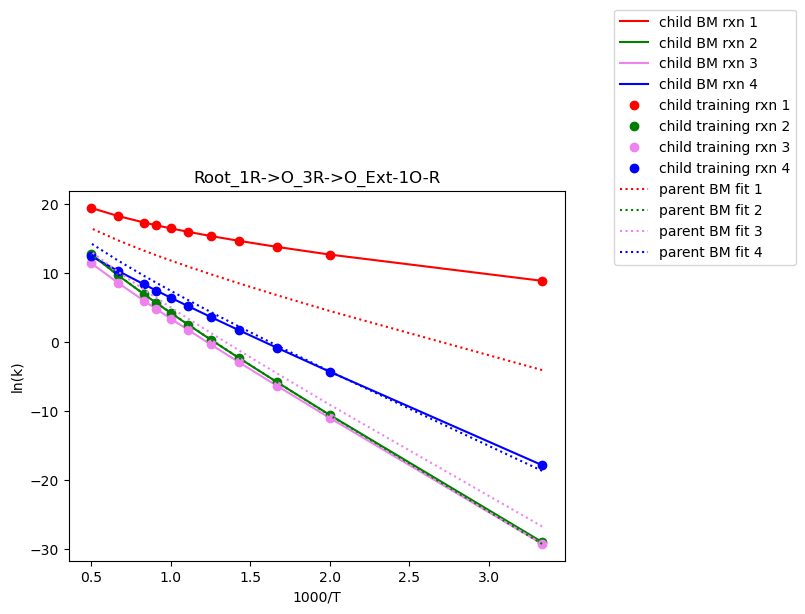

[O]O_r3 + FCCl_r12 <=> [CH2]Cl_p1 + OOF_p23
[O]O_r3 + CCCF_r12 <=> [CH2]CC_p1 + OOF_p23
[O]O_r3 + CCF_r12 <=> C[CH2]_p1 + OOF_p23
CC(C)F + [O]O <=> OOF + C[CH]C
yeah
yeah
yeah
5.69582e-06 5.695820000000001e-06
6.65995e-06 6.659950000000001e-06
5.27349e-06 5.2734900000000006e-06
5.69582e-06 m^3/(mol*s) 5.69582 cm^3/(mol*s)


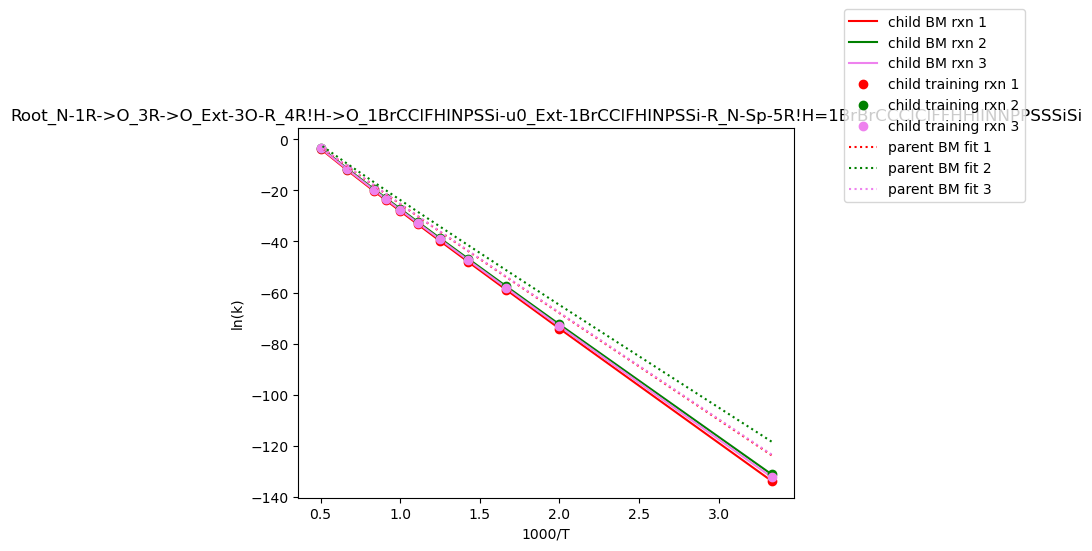

FC(F)F + [O] <=> F[CH]F + [O]F
FC(F)(F)F + [O] <=> F[C](F)F + [O]F
FC(F)F + [OH] <=> F[CH]F + OF
FC(F)(F)F + [OH] <=> F[C](F)F + OF
yeah
yeah
yeah
yeah
48.7171 48.71706943037093
27.1545 27.154525205573123
6.13119 6.131190709115616
7.7908 7.790795026915476
48.7171 m^3/(mol*s) 48.7171 m^3/(mol*s)


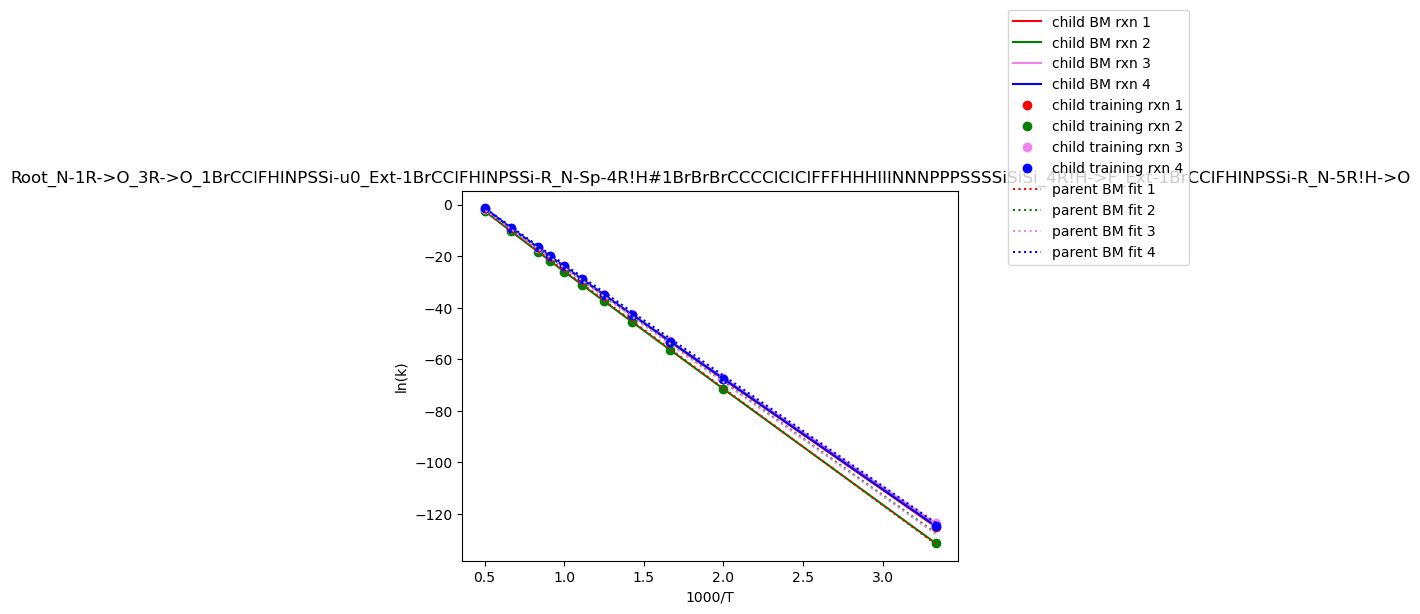

[O]_r3 + O[CH]F_r12 <=> [CH]O_p1 + [O]F_p23
[OH]_r3 + O[CH]F_r12 <=> [CH]O_p1 + OF_p23
[OH]_r3 + O[C](O)F_r12 <=> O[C]O_p1 + OF_p23
C[C](O)F + [OH] <=> OF + C[C]O
yeah
yeah
0.00474579 0.004745790000000001
1.32859 1.3285900000000002


IndexError: list index out of range

In [49]:
#n = 4, node with 4 reactions
%matplotlib inline
temperatures = [ 300., 500.,  600.,  700. , 800.,  900., 1000., 1100., 1200., 1500., 2000.]
inverse_temps = [1000/T for T in temperatures]



for parent_label, children_labels in parent_to_child_4.items():
    
    training_rxns = templateRxnMap[parent_label] 
    for tr_rxn in training_rxns:
        print(tr_rxn)
    BM_entries = [family.retrieve_original_entry(label)[0].data for label in children_labels]

    
    matches = []
    matched_BM = []
    matched_tr = []

    for BM_kinetics in BM_entries:
        for tr_rxn in training_rxns:
            BM_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(BM_kinetics.A.value_si)).group(1)
            tr_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(tr_rxn.kinetics.A.value_si)).group(1)
            if BM_str_of_float==tr_str_of_float:
                print('yeah')
                matches.append((Reaction(reactants=tr_rxn.reactants, products=tr_rxn.products, kinetics = BM_kinetics), tr_rxn))
                matched_BM.append(BM_kinetics)
                matched_tr.append(tr_rxn)
                
    if len(matches)==0:
        print("couldn't find any matches")
        continue
        #skipping because the A's are probably very different
        
    for (BM, tr) in matches:
        print(BM.kinetics.A.value_si, tr.kinetics.A.value_si)
        
#     if 0<len(matches)<len(training_rxns) and len(BM_entries)==len(training_rxns):
#         leftover_tr_rxns = [tr_rxn for tr_rxn in training_rxns if tr_rxn not in matched_tr]
#         leftover_BM_kinetics = [BM_kinetics for BM_kinetics in BM_entries if BM_kinetics not in matched_BM]
#         for leftover_tr_rxn in leftover_tr_rxns:
#             for leftover_BM_kinetics in leftover_BM_kinetics_:
#                 if re.search('([1-9]\.?[0-9][0-9])', str(leftover_BM_kinetics)).group(1)==re.search('([1-9]\.?[0-9][0-9])', str(leftover_tr_rxn.kinetics.A.value_si)).group(1):
#                     leftover_BM_reaction = Reaction(reactants=leftover_tr_rxn.reactants, products=leftover_tr_rxn.products, kinetics = leftover_BM_kinetics)
#                     print(leftover_BM_reaction.kinetics.A, leftover_tr_rxn.kinetics.A)
#                     matches.append((leftover_BM_reaction, leftover_tr_rxn))

    if len(BM_entries)!=len(matches):
        flag=False
    else:
        flag=True

    child_node_1_BM_rxn, child_training_rxn_1= matches[0] 
    child_node_2_BM_rxn, child_training_rxn_2 = matches[1] 
    child_node_3_BM_rxn, child_training_rxn_3= matches[2]
    if flag==True: 
        child_node_4_BM_rxn, child_training_rxn_4 = matches[3] 
    
    #empty lists for collecting data
    parent_node_rate_coefficients_1 = []
    parent_node_rate_coefficients_2 = []
    parent_node_rate_coefficients_3 = []
    parent_node_rate_coefficients_4 = []

    child_node_1_rate_coefficients = []
    child_node_2_rate_coefficients = []
    child_node_3_rate_coefficients = []
    child_node_4_rate_coefficients = []

    child_tr_rxn_coeffs_1 = []
    child_tr_rxn_coeffs_2 = []
    child_tr_rxn_coeffs_3 = []
    child_tr_rxn_coeffs_4 = []
    
    #let's make the parent BM node
    parent_node, _ = family.retrieve_original_entry(parent_label)
    BM_parent_rxn = Reaction(kinetics = parent_node.data)

    
    #get the dHrxns 
    
    dHrxn_1 = child_node_1_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_2 = child_node_2_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_3 = child_node_3_BM_rxn.get_enthalpy_of_reaction(298)
    if flag==True: 
        dHrxn_4 = child_node_4_BM_rxn.get_enthalpy_of_reaction(298)

    
    for temp in temperatures: 
        
        #calculate training rxn rate
        tr_rate_1 = child_training_rxn_1.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_2 =child_training_rxn_2.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_3 = child_training_rxn_3.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        if flag==True: 
            tr_rate_4 =child_training_rxn_4.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap

        child_tr_rxn_coeffs_1.append(tr_rate_1)
        child_tr_rxn_coeffs_2.append(tr_rate_2)
        child_tr_rxn_coeffs_3.append(tr_rate_3)
        if flag==True:
            child_tr_rxn_coeffs_4.append(tr_rate_4)
        
        #calculate BM child rates
        BM_child_rate_1 = child_node_1_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1) #loaded in as BM kinetics 
        BM_child_rate_2 = child_node_2_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2) #loaded in as BM kinetics 
        BM_child_rate_3 = child_node_3_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_3) #loaded in as BM kinetics 
        if flag==True:
            BM_child_rate_4 = child_node_4_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_4) #loaded in as BM kinetics 

        child_node_1_rate_coefficients.append(BM_child_rate_1)
        child_node_2_rate_coefficients.append(BM_child_rate_2)
        child_node_3_rate_coefficients.append(BM_child_rate_3)
        if flag==True:
            child_node_4_rate_coefficients.append(BM_child_rate_4)
        
        #calculate BM for parent node at both dHrxns for child rxns
        BM_parent_node_rate_dH1 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1)
        parent_node_rate_coefficients_1.append(BM_parent_node_rate_dH1)
        BM_parent_node_rate_dH2 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2)
        parent_node_rate_coefficients_2.append(BM_parent_node_rate_dH2)
        BM_parent_node_rate_dH3 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_3)
        parent_node_rate_coefficients_3.append(BM_parent_node_rate_dH3)
        if flag==True:
            BM_parent_node_rate_dH4 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_4)
            parent_node_rate_coefficients_4.append(BM_parent_node_rate_dH4)
        
    
    #get lnks

    parent_node_1 = [np.log(rate) for rate in parent_node_rate_coefficients_1]
    parent_node_2 = [np.log(rate) for rate in parent_node_rate_coefficients_2]
    parent_node_3 = [np.log(rate) for rate in parent_node_rate_coefficients_3]
    if flag==True:
        parent_node_4 = [np.log(rate) for rate in parent_node_rate_coefficients_4]
    
    child_node_1 = [np.log(rate) for rate in child_node_1_rate_coefficients]  
    child_node_2 = [np.log(rate) for rate in child_node_2_rate_coefficients]
    child_node_3 = [np.log(rate) for rate in child_node_3_rate_coefficients]  
    if flag==True:
        child_node_4 = [np.log(rate) for rate in child_node_4_rate_coefficients]
    
    child_tr_1 = [np.log(rate) for rate in child_tr_rxn_coeffs_1]
    child_tr_2 = [np.log(rate) for rate in child_tr_rxn_coeffs_2]
    child_tr_3 = [np.log(rate) for rate in child_tr_rxn_coeffs_3]
    if flag==True:
        child_tr_4 = [np.log(rate) for rate in child_tr_rxn_coeffs_4]


    print(child_node_1_BM_rxn.kinetics.A, child_training_rxn_1.kinetics.A)
    #plotting
    plt.figure()   
    plt.plot(inverse_temps, child_node_1, '-', c= 'r', label = 'child BM rxn 1')
    plt.plot(inverse_temps, child_node_2, '-', c= 'g', label = 'child BM rxn 2')
    plt.plot(inverse_temps, child_node_3, '-', c= 'violet', label = 'child BM rxn 3')
    if flag==True:
        plt.plot(inverse_temps, child_node_4, '-', c= 'b', label = 'child BM rxn 4')
    
    plt.plot(inverse_temps, child_tr_1, 'o', c='r', label='child training rxn 1')
    plt.plot(inverse_temps, child_tr_2, 'o', c='g', label='child training rxn 2')
    plt.plot(inverse_temps, child_tr_3, 'o', c='violet', label='child training rxn 3')
    if flag==True:
        plt.plot(inverse_temps, child_tr_4, 'o', c='b', label='child training rxn 4')
    
    plt.plot(inverse_temps, parent_node_1, ':', c='r', label = 'parent BM fit 1')   
    plt.plot(inverse_temps, parent_node_2, ':', c='g', label = 'parent BM fit 2')
    plt.plot(inverse_temps, parent_node_3, ':', c='violet', label = 'parent BM fit 3')   
    if flag==True:
        plt.plot(inverse_temps, parent_node_4, ':', c='b', label = 'parent BM fit 4')


    plt.title(parent_label)
    plt.xlabel('1000/T')
    plt.ylabel('ln(k)')
    plt.legend(loc=(1.1,0.8))
    plt.show()